In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(123)

%matplotlib inline

# Dataset

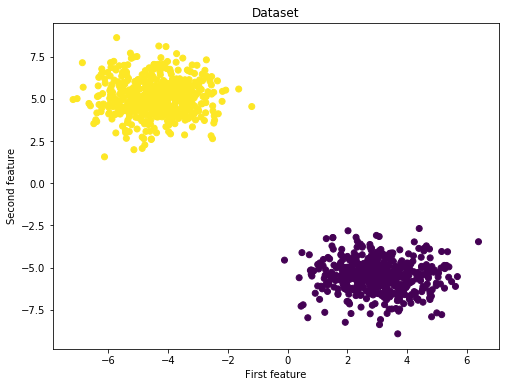

In [7]:
X,y_true = make_blobs(n_samples=1000,centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [8]:
y_true.shape

(1000,)

In [9]:
y_true = y_true[:,np.newaxis]

In [10]:
y_true.shape

(1000, 1)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y_true)
print(f'Shape X_train:{X_train.shape}')
print(f'Shape y_train:{y_train.shape}')
print(f'Shape X_test:{X_test.shape}')
print(f'Shape y_test:{y_test.shape}')

Shape X_train:(750, 2)
Shape y_train:(750, 1)
Shape X_test:(250, 2)
Shape y_test:(250, 1)


# Logistic regression class

In [29]:
class LogisticRegression:
    def __init__(self):
        pass
    def sigmoid(self,a):
        return 1/(1+np.exp(-a))
    #为啥！！！----！！！
    def train(self,X,y_true,n_iters,learning_rate):
        #1、初始化参数
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features,1))
        self.bias = 0
        costs = []
        #2、在循环中根据w、b计算预测的y
        for i in range(n_iters):
            y_predict = self.sigmoid(np.dot(X,self.weights)+self.bias)
            #3、计算cost,对数似然函数，求令cost最小的w和b
            cost = (-1/n_samples) * np.sum(y_true*np.log(y_predict)+(1-y_true)*(np.log(1-y_predict)))
            #4、计算gradient
            dw = (1/n_samples) * np.dot(X.T,(y_predict - y_true))
            db = (1/n_samples) * np.sum(y_predict - y_true)
            #5、更新w、b
            self.weights = self.weights - learning_rate *dw
            self.bias = self.bias - learning_rate * db
            
            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}:{cost}")
            
        return self.weights,self.bias,costs
    def predict(self,X):
        y_predict = self.sigmoid(np.dot(X,self.weights)+self.bias)
        y_predict_labels = [1 if elem >0.5 else 0 for elem in y_predict]
        
        return np.array(y_predict_labels)[:,np.newaxis]

Initialzing and training the model

Cost after iteration 0:0.6931471805599453
Cost after iteration 100:inf
Cost after iteration 200:inf
Cost after iteration 300:inf
Cost after iteration 400:inf
Cost after iteration 500:inf


C:\Users\wangy\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


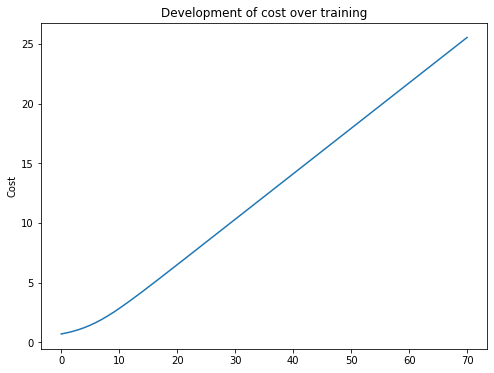

In [30]:
regressor = LogisticRegression()
w_trained, n_trained, costs = regressor.train(X_train,y_train,n_iters=600,learning_rate=0.009)
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600),costs)
plt.title("Development of cost over training")
plt.ylabel("Cost")
plt.show()

# Testing the model

In [31]:
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print(f"train accuracy:{100-np.mean(np.abs(y_p_train-y_train))*100}%")
print(f"test accuracy:{100-np.mean(np.abs(y_p_test-y_test))*100}%")

train accuracy:0.0%
test accuracy:0.0%
